# Name - Saurabh Rajesh Pande
# Batch - A , roll no - 2447006


## Problem statement-Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.describe() 


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0', 'key'], axis=1, inplace=True)

# Removing null values 

In [9]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)

In [10]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [12]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [13]:
df.drop('pickup_datetime', axis=1, inplace=True)

In [14]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


#  Feature extraction 

In [15]:
df['distance'] = np.sqrt((df['dropoff_longitude'] - df['pickup_longitude'])**2 +
                         (df['dropoff_latitude'] - df['pickup_latitude'])**2)

In [16]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0.051031
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.001064
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,0.022126
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0.142223
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,0.033101


# Correlation matrix

In [24]:
import matplotlib.pyplot as plt

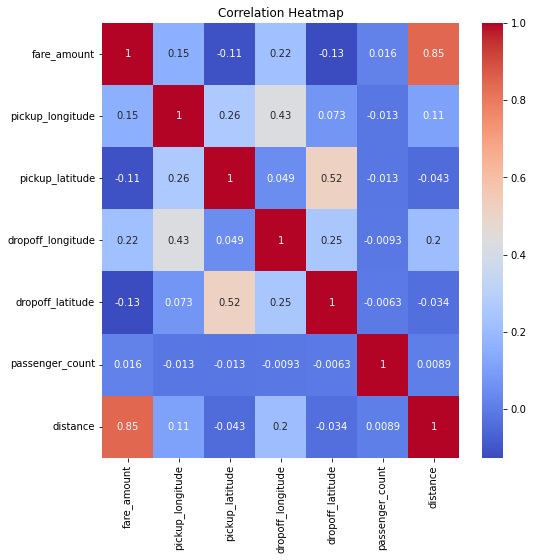

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# removing outliers

In [27]:
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

In [28]:
for col in ['fare_amount', 'distance', 'passenger_count' ,'pickup_longitude' , 'pickup_latitude', 'dropoff_longitude' , 'dropoff_latitude']:
    df = remove_outlier(df, col)

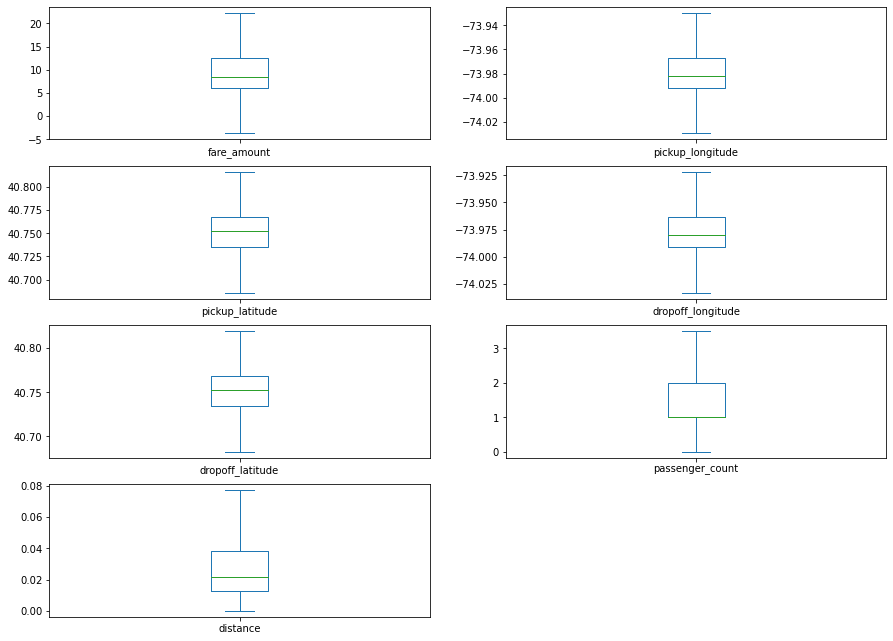

In [29]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 
plt.show()

# features and target 

In [30]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']]
y = df['fare_amount']

# Spliting dataset 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled


array([[-0.01226903, -0.06991932, -0.03073848,  1.2138501 , -0.58650941,
         0.37483597],
       [ 0.00662838,  0.09171642,  2.37034856,  2.41143125, -0.58650941,
         2.24096005],
       [-0.7768083 ,  0.04078849, -1.01600737,  0.41380699, -0.58650941,
        -0.75712114],
       ...,
       [-0.70908039,  0.33083593, -1.12587061, -0.55060082, -0.58650941,
        -0.11735303],
       [ 0.86814505,  0.28587429,  0.77400644,  0.56358165,  2.26442952,
        -0.89247285],
       [-0.52118059,  1.05380979,  1.00130214,  0.99140454,  0.55386616,
         0.33347304]])

In [34]:
X_test_scaled

array([[-1.08033875, -1.02132797, -0.58941775, -0.85112746, -0.58650941,
        -0.80608766],
       [ 2.37059876, -2.49292002,  2.37034856, -2.36043471,  2.26442952,
        -1.30851879],
       [ 1.12401691,  1.12645814,  0.24731045,  0.50501211,  2.26442952,
        -0.34372174],
       ...,
       [-0.09210691,  0.79281389, -0.35109635,  0.54330221,  0.55386616,
        -1.02199842],
       [-0.63817849, -0.41389734, -0.4990245 , -0.00717465, -0.58650941,
        -0.79918857],
       [-0.17072403,  0.0709319 , -0.14961479,  0.53572796, -0.58650941,
        -0.67819793]])

# Lineaer Regression

In [35]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
y_pred_linear = linear_reg.predict(X_test_scaled)


In [38]:
linear_r2 = r2_score(y_test, y_pred_linear)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Ridge Regression

In [39]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)


Ridge()

In [40]:
y_pred_ridge = ridge_reg.predict(X_test_scaled)

In [41]:
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Lasso Regression

In [42]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [43]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [44]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Comparing results

In [45]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R2 Score': [linear_r2, ridge_r2, lasso_r2],
    'RMSE': [linear_rmse, ridge_rmse, lasso_rmse]
})

In [46]:
print(results)


               Model  R2 Score      RMSE
0  Linear Regression  0.723060  2.870445
1   Ridge Regression  0.723060  2.870444
2   Lasso Regression  0.721966  2.876108
